In [3]:
import pandas as pd
import seaborn as sns

insurance = pd.read_csv("Data/insurance.csv")

In [57]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

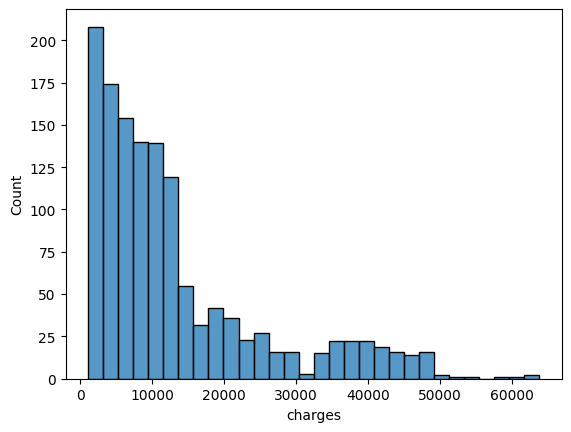

In [7]:
sns.histplot(insurance["charges"])

<Axes: xlabel='charges'>

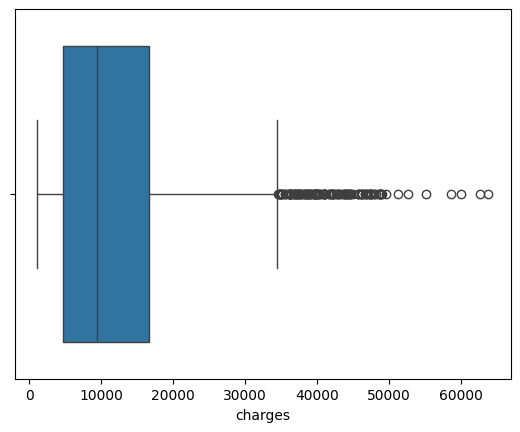

In [8]:
sns.boxplot(x=insurance["charges"])

<Axes: xlabel='charges'>

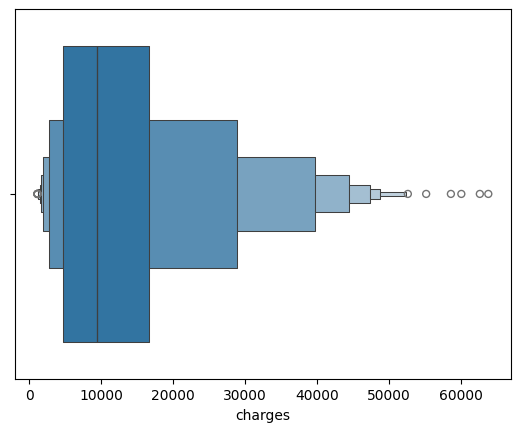

In [9]:
sns.boxenplot(x=insurance["charges"])

<Axes: xlabel='age', ylabel='Count'>

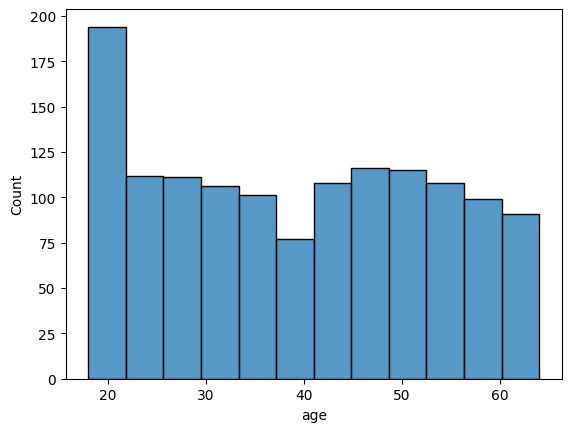

In [10]:
sns.histplot(x=insurance["age"])

In [11]:
insurance["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
insurance["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [29]:
corr = insurance.corr(numeric_only=True)

<Axes: >

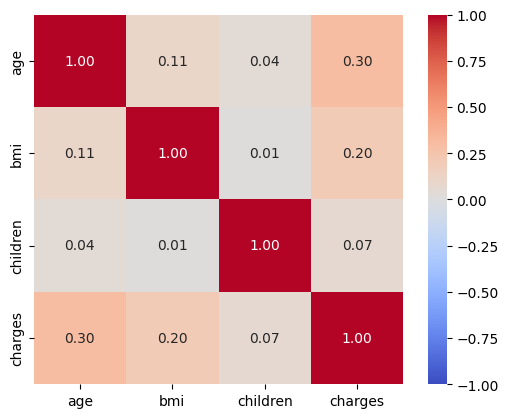

In [18]:
# Correlation graf
sns.heatmap(corr, fmt='.2f', vmin=-1, vmax=1, annot=True, cbar=True, square=True, cmap="coolwarm")

<Axes: xlabel='age', ylabel='charges'>

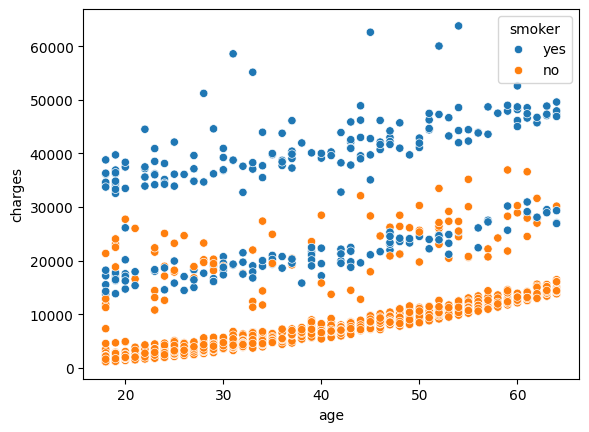

In [20]:
# Correlation between age and charges for smokers and no-smokers
sns.scatterplot(insurance, x="age", y="charges", hue="smoker")

<Axes: xlabel='age', ylabel='charges'>

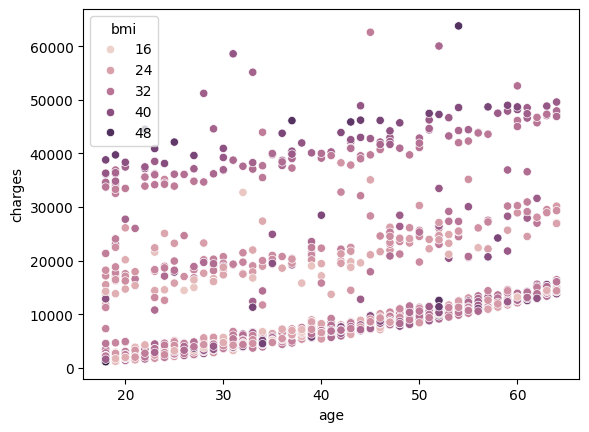

In [38]:
# Correlation between age and charges with bmi values
sns.scatterplot(insurance, x="age", y="charges", hue="bmi")

<Axes: xlabel='smoker'>

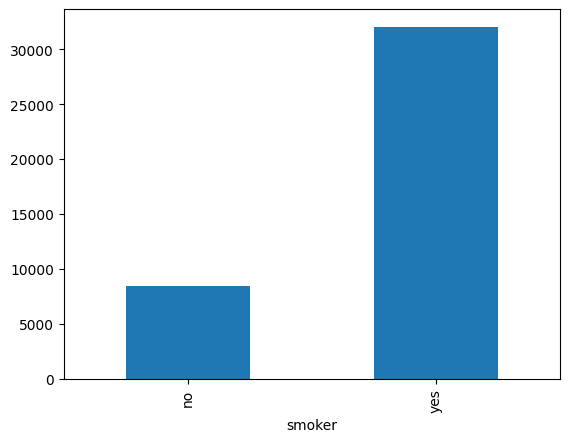

In [22]:
# How smker column impact price for insurance
insurance.groupby("smoker")["charges"].mean().plot.bar()

<Axes: xlabel='age', ylabel='bmi'>

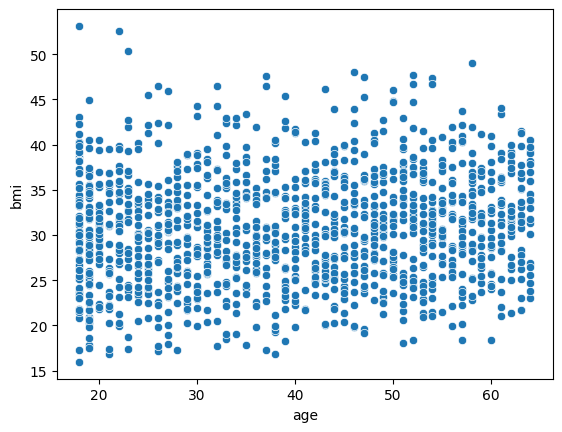

In [24]:
sns.scatterplot(insurance, x="age", y="bmi")

<Axes: xlabel='smoker'>

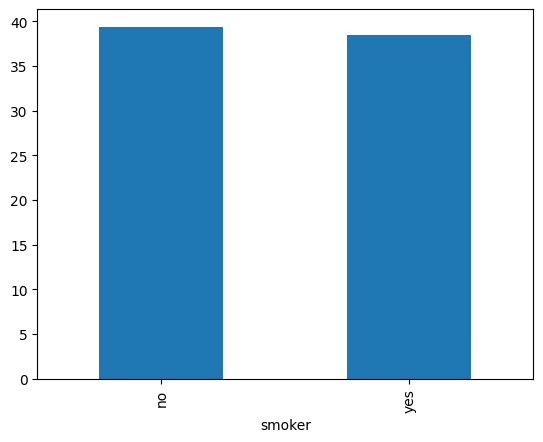

In [25]:
insurance.groupby("smoker")["age"].mean().plot.bar()

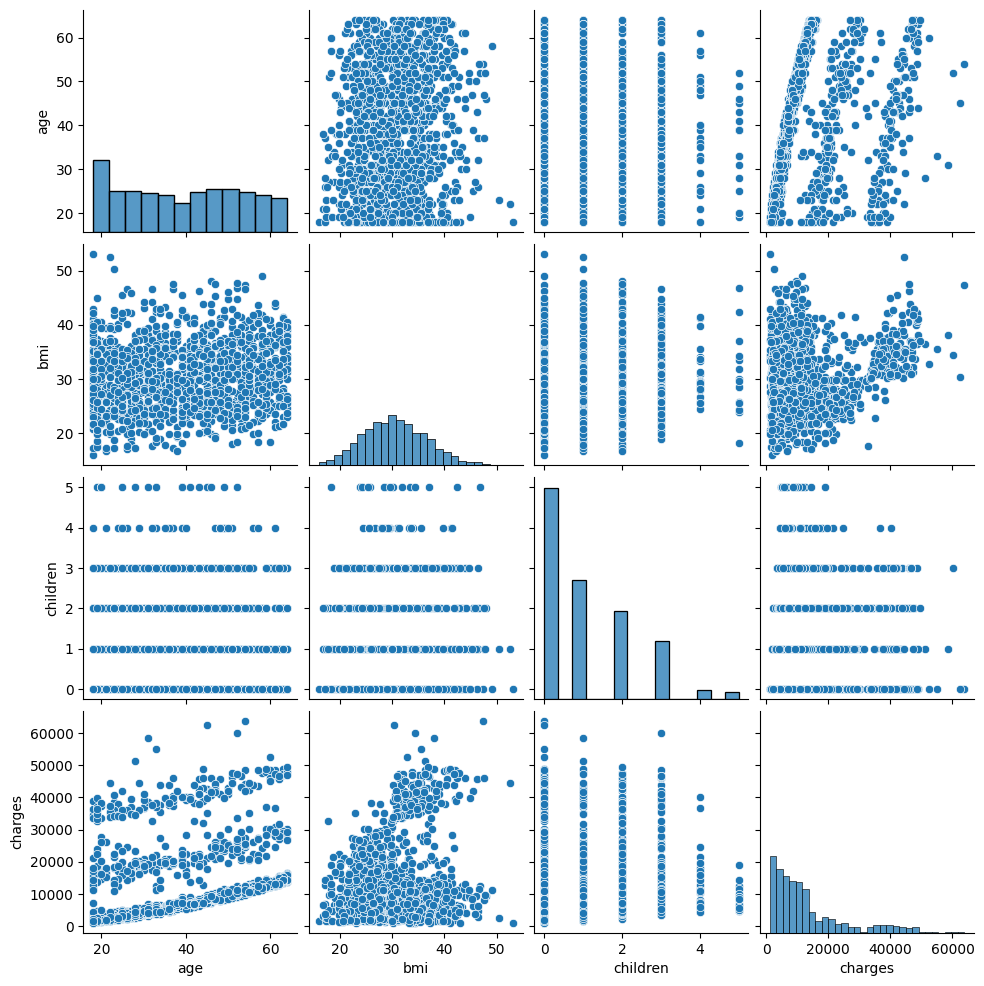

In [26]:
sns.pairplot(insurance)

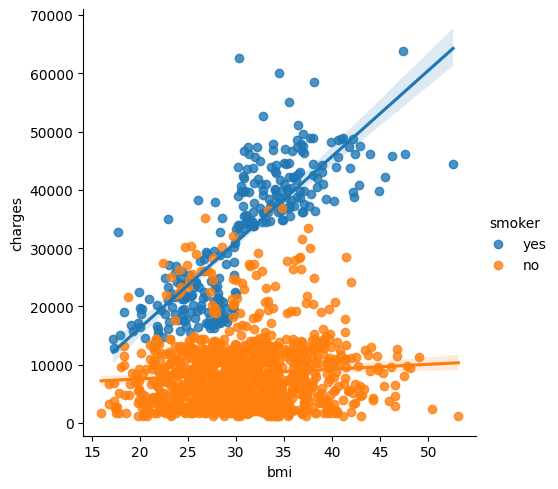

In [28]:
# Checking correlation between bmi and charges and how column "smoker" impact the result
sns.lmplot(insurance, x="bmi", y="charges", hue="smoker")

In [30]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [33]:
# Making X and y variables for model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
X = sm.add_constant(insurance["age"])
y = insurance["charges"]

In [34]:
# Building model
model = sm.OLS(y, X).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           4.89e-29
Time:                        16:17:04   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Build predictors for prediction: add constant and age
customer_ages = [18, 25, 35, 45, 55]
X_predict = sm.add_constant(pd.DataFrame({"age": customer_ages}))
X_predict

,const,age
0,1.0,18
1,1.0,25
2,1.0,35
3,1.0,45
4,1.0,55


In [45]:
predictions = model.predict(X_predict)
predictions.name = "predictions"

In [49]:
predictions

0     7804.892142
1     9608.950473
2    12186.176659
3    14763.402846
4    17340.629033
Name: predictions, dtype: float64

In [54]:
# Filter to ages in customer_ages, compute mean charges per age, merge with predictions by index, then add 'error' = prediction − actual mean charges.
(insurance
 .query("age in @customer_ages")
 .groupby("age")
 .agg({"charges": "mean"})
 .reset_index()
 .merge(predictions, left_index=True, right_index=True)
 .assign(
     error = lambda x: x["predictions"] - x["charges"]
 )
)

,age,charges,predictions,error
0,18,7086.217556,7804.892142,718.674586
1,25,9838.365311,9608.950473,-229.414838
2,35,11307.182031,12186.176659,878.994628
3,45,14830.199856,14763.402846,-66.797010
4,55,16164.545488,17340.629033,1176.083544


<Axes: ylabel='None'>

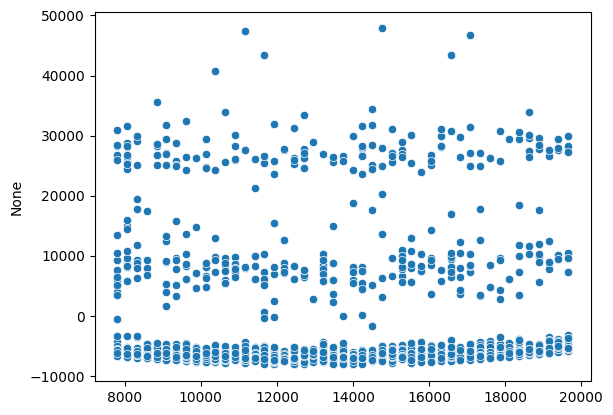

In [55]:
sns.scatterplot(x=model.predict(), y=model.resid)